In [1]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.3 MB/s eta 0:00:0000:010:01


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from pandas.core.base import PandasObject
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# import torch
# from torch_geometric.data import Data, DataLoader

In [2]:
train_data = pd.read_csv('/kaggle/input/quant-fin/train.csv')
test_data = pd.read_csv('/kaggle/input/quant-fin/test.csv')
solution = pd.read_csv('/kaggle/input/quant-fin/solution.csv')

In [3]:
#Объединили train и test
all_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)

In [4]:
print(len(all_data))
print(len(train_data))
print(len(test_data))

1707198
1366032
341166


In [7]:
train_data.result.value_counts()

result
1    1216877
0     149155
Name: count, dtype: int64

In [10]:
test_data.result.value_counts()

result
1    303626
0     37540
Name: count, dtype: int64

In [11]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1366032 entries, 0 to 1366031
Data columns (total 39 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   rsi_sig        1366032 non-null  object 
 1   vwap_short     1366032 non-null  float64
 2   resist3        1366032 non-null  float64
 3   stoch_k        1366032 non-null  float64
 4   vwap_long      1366032 non-null  float64
 5   support3       1366032 non-null  float64
 6   fibo_sig       1366032 non-null  object 
 7   result         1366032 non-null  int64  
 8   stoch_k_sm     1366032 non-null  float64
 9   boll_up        1366032 non-null  float64
 10  stoch_d        1366032 non-null  float64
 11  ichi_sig       1366032 non-null  object 
 12  boll_low       1366032 non-null  float64
 13  stoch_sig      1366032 non-null  object 
 14  macd_rel       1366032 non-null  float64
 15  pivot_pt       1366032 non-null  float64
 16  macd_sig_rel   1366032 non-null  float64
 17  wma_rel 

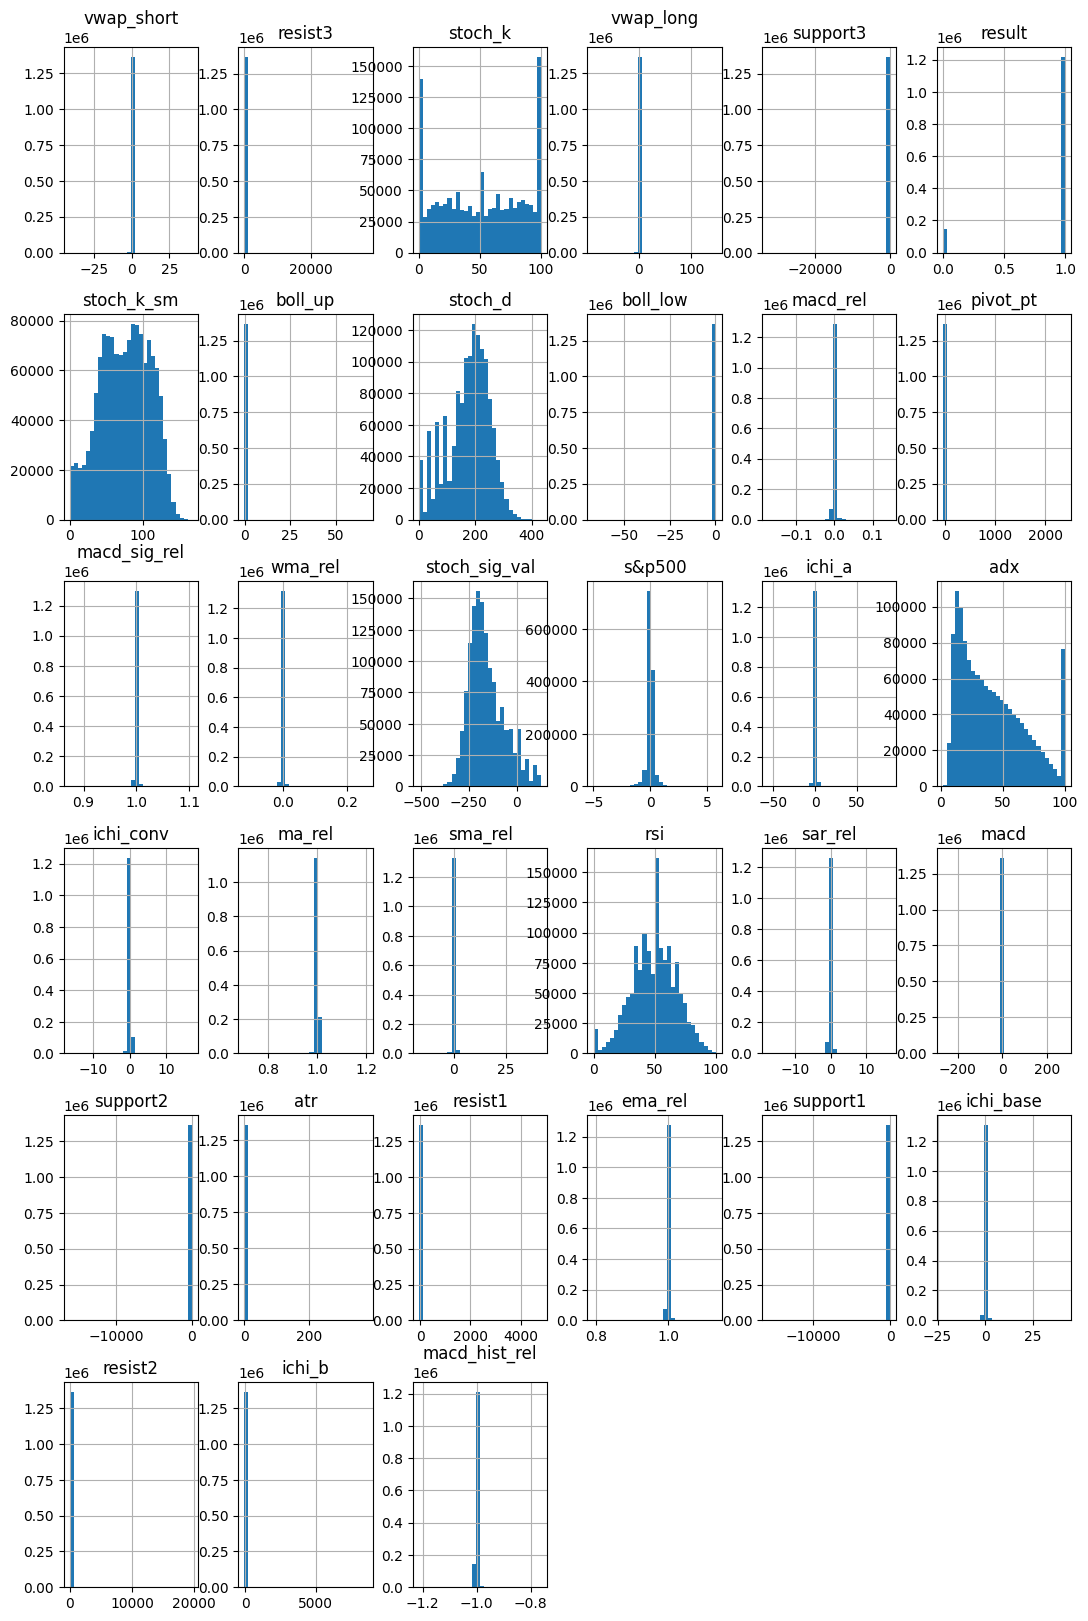

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

train_data.select_dtypes(include=['int64', 'float64']).hist(bins=30, figsize=(13, 20))
plt.show()

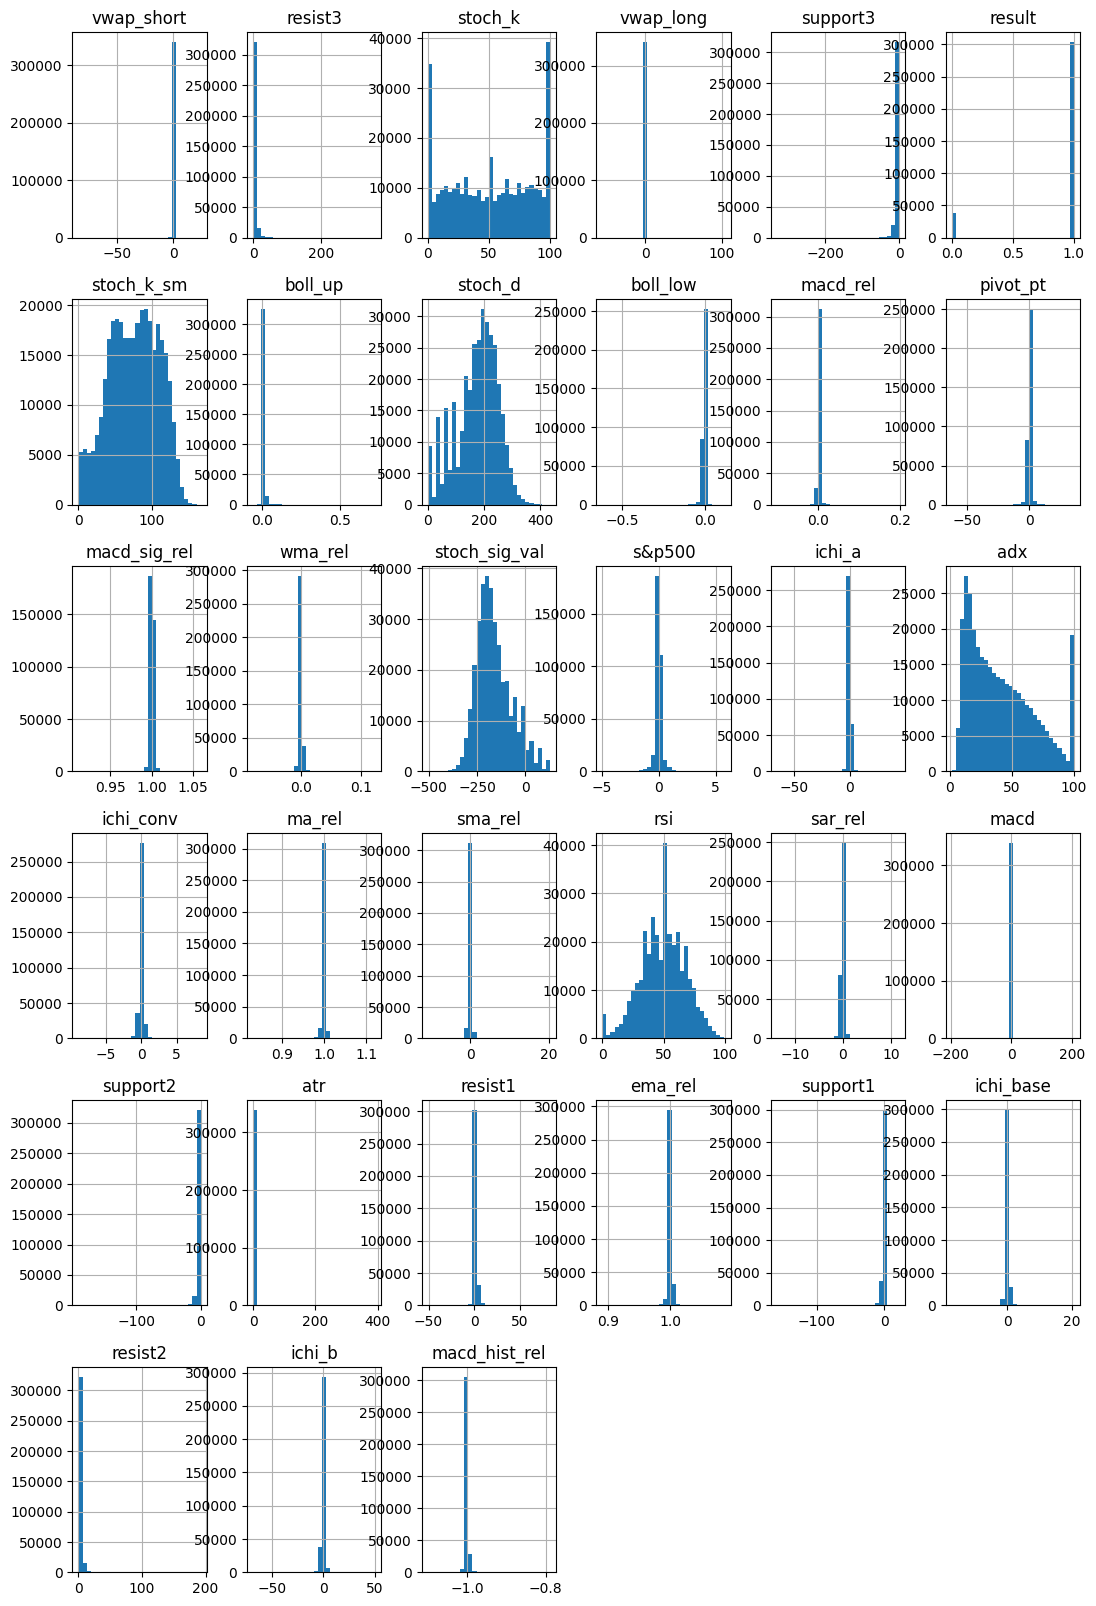

In [10]:
test_data.select_dtypes(include=['int64', 'float64']).hist(bins=30, figsize=(13, 20))
plt.show()

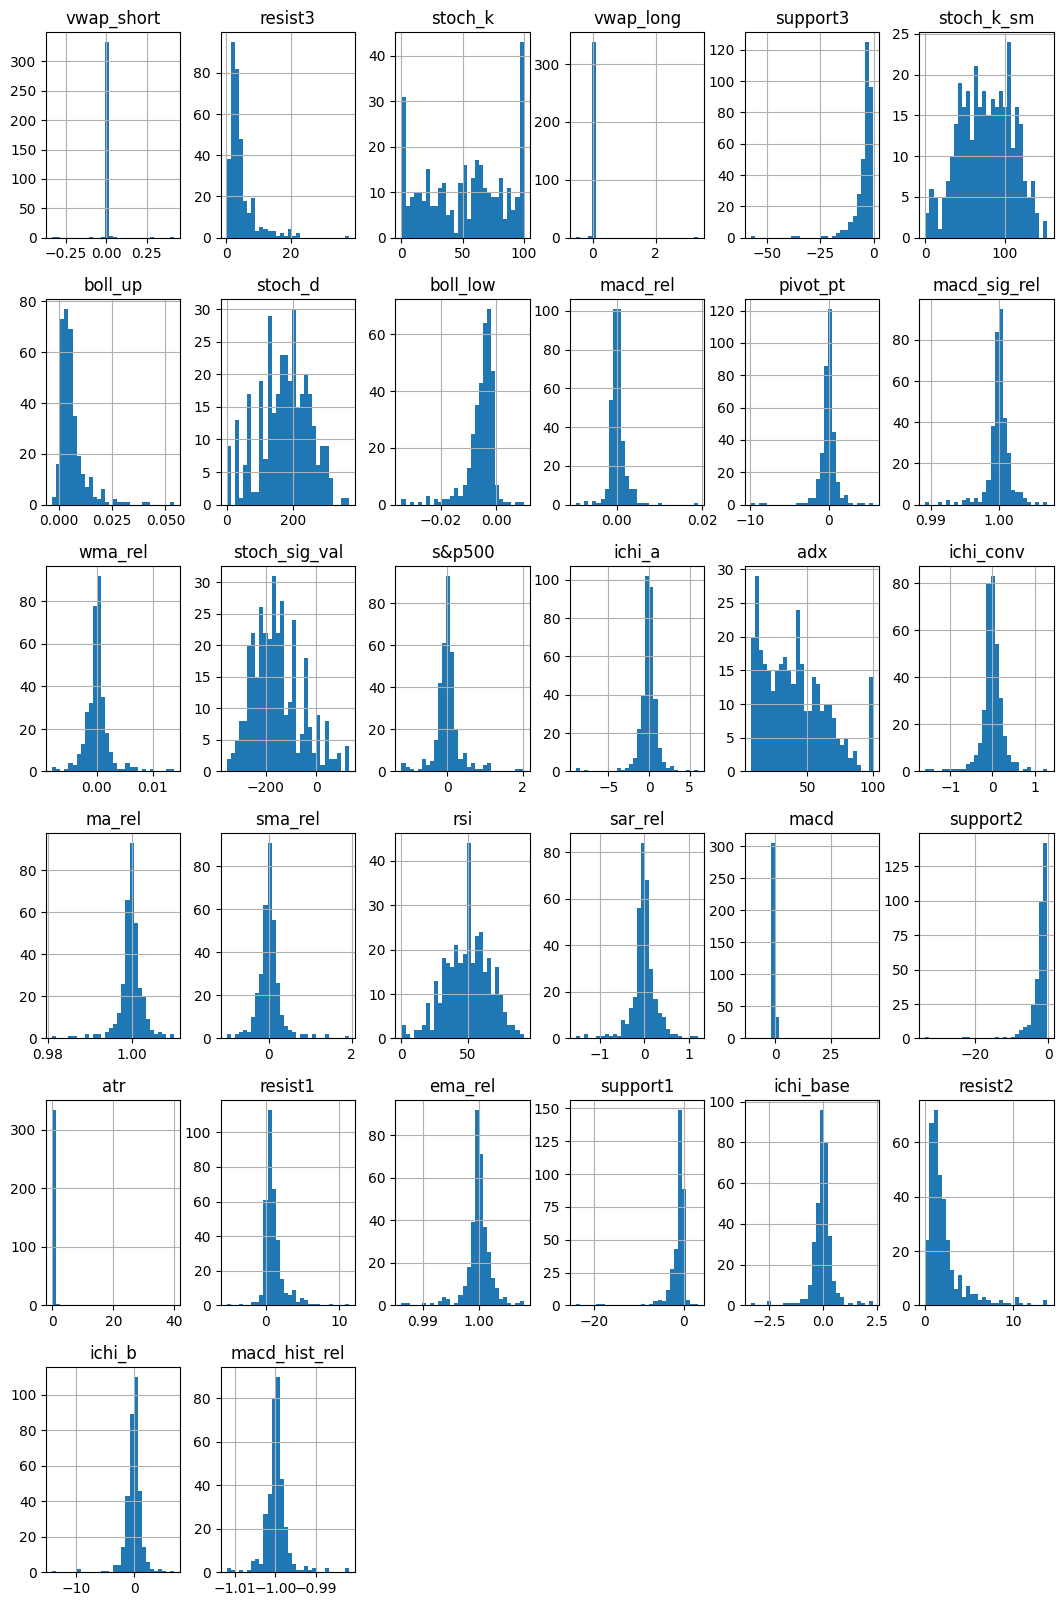

In [11]:
# Постройте гистограммы для всех числовых переменных
solution.select_dtypes(include=['int64', 'float64']).hist(bins=30, figsize=(13, 20))
plt.show()

# Data Preprocessing

In [12]:
missing_values_train = train_data.isnull().sum()
print("Количество пропусков в train_data:")
print(missing_values_train)

missing_values_test = test_data.isnull().sum()
print("\nКоличество пропусков в test_data:")
print(missing_values_test)

Количество пропусков в train_data:
rsi_sig          0
vwap_short       0
resist3          0
stoch_k          0
vwap_long        0
support3         0
fibo_sig         0
result           0
stoch_k_sm       0
boll_up          0
stoch_d          0
ichi_sig         0
boll_low         0
stoch_sig        0
macd_rel         0
pivot_pt         0
macd_sig_rel     0
wma_rel          0
stoch_sig_val    0
s&p500           0
ichi_a           0
boll_sig         0
adx              0
ichi_conv        0
ma_rel           0
sma_rel          0
rsi              0
sar_rel          0
macd             0
support2         0
atr              0
resist1          0
ema_rel          0
support1         0
ichi_base        0
exch             0
resist2          0
ichi_b           0
macd_hist_rel    0
dtype: int64

Количество пропусков в test_data:
rsi_sig          0
vwap_short       0
resist3          0
stoch_k          0
vwap_long        0
support3         0
fibo_sig         0
result           0
stoch_k_sm       0
boll_

Пропусков нет!

In [13]:
train_class_counts = train_data['result'].value_counts()
test_class_counts = test_data['result'].value_counts()
print("Процентное соотношение классов в тренировочном наборе:")
print(train_class_counts / len(train_data) * 100)
print("Процентное соотношение классов в тестовом наборе:")
print(test_class_counts / len(test_data) * 100)

Процентное соотношение классов в тренировочном наборе:
result
1    89.081149
0    10.918851
Name: count, dtype: float64
Процентное соотношение классов в тестовом наборе:
result
1    88.996559
0    11.003441
Name: count, dtype: float64


С

In [17]:
train_counts = train_data['result'].value_counts().sort_index()
test_counts = test_data['result'].value_counts().sort_index()
train_with_0, train_with_1 = train_counts.get(0, 0), train_counts.get(1, 0)
test_with_0, test_with_1 = test_counts.get(0, 0), test_counts.get(1, 0)
train_counts_list = [train_with_0 / 1000, train_with_1 / 1000]
test_counts_list = [test_with_0 / 1000, test_with_1 / 1000]
labels = ['Class 0', 'Class 1']
train_counts_list = [train_with_0, train_with_1]
test_counts_list = [test_with_0, test_with_1]
print(train_with_0, train_with_1)
print(test_with_0, test_with_1)

149155 1216877
37540 303626


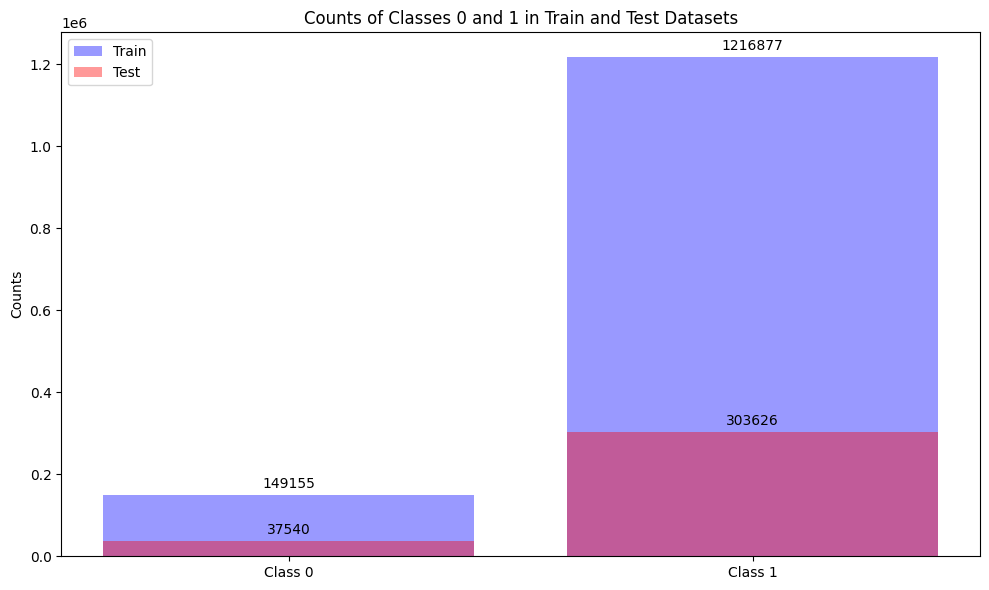

In [16]:
x = range(len(labels))
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x, train_counts_list, label='Train', color='blue', alpha=0.4)
rects2 = ax.bar([i for i in x], test_counts_list, label='Test', color='red', alpha=0.4)
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
ax.set_ylabel('Counts')
ax.set_title('Counts of Classes 0 and 1 in Train and Test Datasets')
ax.set_xticks([i for i in x])
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# Random Forest

In [5]:
df = solution.copy()
signals = train_data[['rsi_sig', 'stoch_sig', 'ichi_sig', 'fibo_sig', 'boll_sig', 'exch', 'result']]
signals

,rsi_sig,stoch_sig,ichi_sig,fibo_sig,boll_sig,exch,result
0,Hold,Sell,Sell,Sell,Hold,BC,0
1,Sell,Sell,Sell,Buy,Hold,BB,1
2,Hold,Buy,Sell,Sell,Hold,BB,1
3,Hold,Sell,Buy,Sell,Hold,BC,1
4,Buy,Sell,Buy,Sell,Hold,OK,1
...,...,...,...,...,...,...,...
1366027,Hold,Sell,Sell,Buy,Hold,OK,1
1366028,Hold,Sell,Sell,Sell,Hold,BC,1
1366029,Hold,Sell,Buy,Buy,Hold,OK,0
1366030,Hold,Sell,Sell,Buy,Hold,HB,1


In [6]:
def action_to_value(action):
    if action == 'Hold':
        return 1
    elif action in ['Sell', 'Buy']:
        return 0
    
signals['rsi_sig_num'] = signals['rsi_sig'].apply(action_to_value)
signals['stoch_sig_num'] = signals['stoch_sig'].apply(action_to_value)
signals['ichi_sig_num'] = signals['ichi_sig'].apply(action_to_value)
signals['fibo_sig_num'] = signals['fibo_sig'].apply(action_to_value)
signals['boll_sig_num'] = signals['boll_sig'].apply(action_to_value)
signals

/tmp/ipykernel_36/4062024282.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['rsi_sig_num'] = signals['rsi_sig'].apply(action_to_value)
/tmp/ipykernel_36/4062024282.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['stoch_sig_num'] = signals['stoch_sig'].apply(action_to_value)
/tmp/ipykernel_36/4062024282.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,rsi_sig,stoch_sig,ichi_sig,fibo_sig,boll_sig,exch,result,rsi_sig_num,stoch_sig_num,ichi_sig_num,fibo_sig_num,boll_sig_num
0,Hold,Sell,Sell,Sell,Hold,BC,0,1,0,0,0,1
1,Sell,Sell,Sell,Buy,Hold,BB,1,0,0,0,0,1
2,Hold,Buy,Sell,Sell,Hold,BB,1,1,0,0,0,1
3,Hold,Sell,Buy,Sell,Hold,BC,1,1,0,0,0,1
4,Buy,Sell,Buy,Sell,Hold,OK,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1366027,Hold,Sell,Sell,Buy,Hold,OK,1,1,0,0,0,1
1366028,Hold,Sell,Sell,Sell,Hold,BC,1,1,0,0,0,1
1366029,Hold,Sell,Buy,Buy,Hold,OK,0,1,0,0,0,1
1366030,Hold,Sell,Sell,Buy,Hold,HB,1,1,0,0,0,1


In [7]:
corr_sig = signals.select_dtypes(include='number').corr()['result']
corr_sig

result           1.000000
rsi_sig_num      0.023142
stoch_sig_num    0.033990
ichi_sig_num     0.015326
fibo_sig_num     0.018370
boll_sig_num     0.087793
Name: result, dtype: float64

In [8]:
signals.select_dtypes(include='number').corr()

,result,rsi_sig_num,stoch_sig_num,ichi_sig_num,fibo_sig_num,boll_sig_num
result,1.000000,0.023142,0.033990,0.015326,0.018370,0.087793
rsi_sig_num,0.023142,1.000000,-0.112436,0.011489,-0.021308,0.340441
stoch_sig_num,0.033990,-0.112436,1.000000,0.060007,0.186255,-0.000848
ichi_sig_num,0.015326,0.011489,0.060007,1.000000,0.034382,-0.004405
fibo_sig_num,0.018370,-0.021308,0.186255,0.034382,1.000000,0.021926
boll_sig_num,0.087793,0.340441,-0.000848,-0.004405,0.021926,1.000000


In [9]:
signals_num = signals.select_dtypes(include='number')
signals_num.drop('result', axis=1, inplace=True)
signals_num

,rsi_sig_num,stoch_sig_num,ichi_sig_num,fibo_sig_num,boll_sig_num
0,1,0,0,0,1
1,0,0,0,0,1
2,1,0,0,0,1
3,1,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
1366027,1,0,0,0,1
1366028,1,0,0,0,1
1366029,1,0,0,0,1
1366030,1,0,0,0,1


In [10]:
train = train_data.select_dtypes(include='number').join(signals_num)
y_train = train.result
X_train = train.copy()
X_train.drop('result', axis = 1, inplace=True)
y_train

0          0
1          1
2          1
3          1
4          1
          ..
1366027    1
1366028    1
1366029    0
1366030    1
1366031    0
Name: result, Length: 1366032, dtype: int64

In [11]:
test = test_data.copy()

test['rsi_sig_num'] = test['rsi_sig'].apply(action_to_value)
test['stoch_sig_num'] = test['stoch_sig'].apply(action_to_value)
test['ichi_sig_num'] = test['ichi_sig'].apply(action_to_value)
test['fibo_sig_num'] = test['fibo_sig'].apply(action_to_value)
test['boll_sig_num'] = test['boll_sig'].apply(action_to_value)

test.drop(['rsi_sig', 'stoch_sig', 'ichi_sig', 'fibo_sig', 'boll_sig', 'exch'], axis=1, inplace=True)

y_test = test.result
X_test = test.copy()
X_test.drop('result', axis = 1, inplace=True)
y_test

0         1
1         1
2         1
3         1
4         0
         ..
341161    1
341162    0
341163    1
341164    1
341165    1
Name: result, Length: 341166, dtype: int64

In [14]:
all_data = all_data.copy()
all_data['rsi_sig_num'] = all_data['rsi_sig'].apply(action_to_value)
all_data['stoch_sig_num'] = all_data['stoch_sig'].apply(action_to_value)
all_data['ichi_sig_num'] = all_data['ichi_sig'].apply(action_to_value)
all_data['fibo_sig_num'] = all_data['fibo_sig'].apply(action_to_value)
all_data['boll_sig_num'] = all_data['boll_sig'].apply(action_to_value)

all_data.drop(['rsi_sig', 'stoch_sig', 'ichi_sig', 'fibo_sig', 'boll_sig', 'exch'], axis=1, inplace=True)

y_all = all_data.result
X_all = all_data.copy()
X_all.drop('result', axis = 1, inplace=True)
X_all

,vwap_short,resist3,stoch_k,vwap_long,support3,stoch_k_sm,boll_up,stoch_d,boll_low,macd_rel,...,support1,ichi_base,resist2,ichi_b,macd_hist_rel,rsi_sig_num,stoch_sig_num,ichi_sig_num,fibo_sig_num,boll_sig_num
0,0.000314,32.11,5.115713,-9.398346e-05,-24.93,41.644171,0.005576,187.758006,-0.067957,-0.004404,...,-4.76,2.722192,17.85,5.110871,-1.027237,1,0,0,0,1
1,0.000000,5.60,85.714286,1.585063e-06,-6.44,113.015873,0.017626,222.222222,-0.000632,0.003947,...,-1.64,-1.103310,2.59,-0.451354,-0.993209,0,0,0,0,1
2,0.000000,1.30,50.000000,0.000000e+00,-1.30,46.666667,0.002156,33.333333,-0.001505,0.000200,...,-0.37,-0.061000,0.65,-0.020333,-0.999840,1,0,0,0,1
3,-0.000088,2.30,71.428571,-3.290121e-07,-2.27,114.920635,0.004187,288.888889,-0.002797,0.000621,...,-0.54,-0.204248,1.16,-0.040850,-0.999806,1,0,0,0,1
4,-0.000003,1.37,9.090909,-3.157212e-07,-1.03,37.272727,0.000846,150.000000,-0.004172,-0.000817,...,-0.15,0.168413,0.77,0.168413,-1.001124,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707193,0.000130,3.03,13.600000,-1.998851e-04,-1.97,30.951225,0.002213,100.356125,-0.004950,-0.000903,...,-0.14,0.172329,1.78,0.509746,-1.001052,0,0,0,0,1
1707194,-0.000141,11.42,59.793814,-1.494860e-04,-9.46,72.634837,0.015706,123.998928,-0.017352,0.000376,...,-2.36,-0.038847,6.20,2.505633,-1.000988,1,0,0,0,1
1707195,-0.000014,3.32,62.068966,1.717077e-05,-5.37,86.570516,0.007630,184.576720,-0.000503,0.002973,...,-2.51,-0.271512,1.15,-1.232247,-0.997460,1,0,0,0,1
1707196,0.000005,2.90,16.666667,1.923940e-06,-3.46,26.274510,0.003680,64.705882,-0.005535,-0.000047,...,-0.95,0.092240,1.31,-0.568317,-1.000446,1,0,0,0,1


In [15]:
test.isna().sum().sum()

0

In [16]:
train.isna().sum().sum()

0

In [17]:
df = solution.copy()
df['rsi_sig_num'] = df['rsi_sig'].apply(action_to_value)
df['stoch_sig_num'] = df['stoch_sig'].apply(action_to_value)
df['ichi_sig_num'] = df['ichi_sig'].apply(action_to_value)
df['fibo_sig_num'] = df['fibo_sig'].apply(action_to_value)
df['boll_sig_num'] = df['boll_sig'].apply(action_to_value)

df.drop(['rsi_sig', 'stoch_sig', 'ichi_sig', 'fibo_sig', 'boll_sig', 'exch'], axis=1, inplace=True)

X_df = df.copy()

In [30]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# standardizer = StandardScaler()
# X_train_scaled = standardizer.fit_transform(X_train)
# X_test_scaled = standardizer.fit_transform(X_test)

pca = PCA(n_components=17)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)


Convex hulls intersect: classes are not linearly separable.


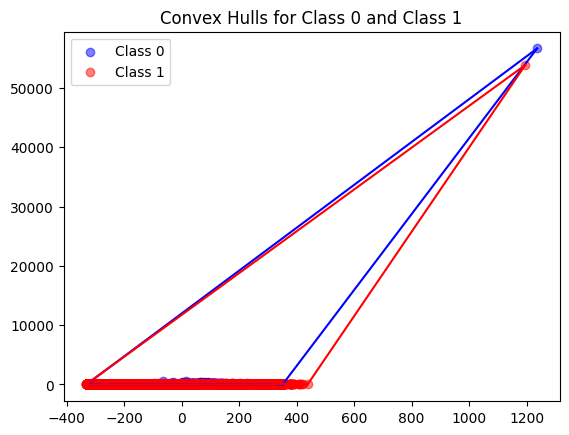

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, Delaunay
from sklearn.decomposition import PCA
class_0 = X_train[y_train == 0]
class_1 = X_train[y_train == 1]
def plot_convex_hull(points, ax, color):
    hull = ConvexHull(points)
    for simplex in hull.simplices:
        ax.plot(points[simplex, 0], points[simplex, 1], color)
def check_hulls_intersection(points1, points2):
    hull1 = ConvexHull(points1)
    hull2 = ConvexHull(points2)
    delaunay1 = Delaunay(points1[hull1.vertices])
    delaunay2 = Delaunay(points2[hull2.vertices])
    for point in points2[hull2.vertices]:
        if delaunay1.find_simplex(point) >= 0:
            return True
    for point in points1[hull1.vertices]:
        if delaunay2.find_simplex(point) >= 0:
            return True 
    return False 
pca_2d = PCA(n_components=2)
X_train_2d = pca_2d.fit_transform(X_train)
class_0_2d = X_train_2d[y_train == 0]
class_1_2d = X_train_2d[y_train == 1]
hulls_intersect = check_hulls_intersection(class_0_2d, class_1_2d)
fig, ax = plt.subplots()
ax.scatter(class_0_2d[:, 0], class_0_2d[:, 1], label='Class 0', color='blue', alpha=0.5)
ax.scatter(class_1_2d[:, 0], class_1_2d[:, 1], label='Class 1', color='red', alpha=0.5)
plot_convex_hull(class_0_2d, ax, 'blue')
plot_convex_hull(class_1_2d, ax, 'red')
ax.set_title('Convex Hulls for Class 0 and Class 1')
ax.legend()
if hulls_intersect:
    print("Convex hulls intersect: classes are not linearly separable.")
else:
    print("Convex hulls do not intersect: classes are linearly separable.")

plt.show()

# Experiments

# # 1. KNN

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=23)
knn_model.fit(X_train, y_train)
knn_model.score(X_test, y_test)
knn_pred = knn_model.predict(df)
knn_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

# # 2. Desicion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
%%time
decision_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
decision_model.fit(X_train.head(650000), y_train.head(650000))
decision_model.score(X_test, y_test)

# # 3. Naive Bayes 

In [ ]:
from sklearn.naive_bayes import GaussianNB
%%time
naive_model = GaussianNB()
naive_model.fit(X_train.head(650000), y_train.head(650000))  
naive_model.score(X_test, y_test)

# # 4. Support Vector Machine

In [ ]:
from sklearn.svm import SVC
%%time
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train.head(650000), y_train.head(650000))
svm_model.score(X_test, y_test)

# # 5. Random Forest

In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
alpha = 0.3
X_train_smoothed = X_train.copy()
X_test_smoothed = X_test.copy()

for column in X_train.columns:
    X_train_smoothed[column] = X_train[column].ewm(alpha=alpha).mean()
    X_test_smoothed[column] = X_test[column].ewm(alpha=alpha).mean()

In [32]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
alpha = 0.3
X_df_smoothed = X_df.copy()
for column in X_df.columns:
    X_df_smoothed[column] = X_df[column].ewm(alpha=alpha).mean()

In [26]:
x_all = pd.concat([X_train_smoothed, X_test_smoothed], axis=0, ignore_index=True) 

In [28]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_split=2)
rf_model.fit(x_all, y_all)
accuracy = rf_model.score(X_test_smoothed, y_test)
print(f"Accuracy on smoothed data: {accuracy:.2f}")

Accuracy on smoothed data: 0.94


In [34]:
accuracy = rf_model.score(X_train_smoothed, y_train)
print(f"Accuracy on smoothed data: {accuracy:.2f}")

Accuracy on smoothed data: 0.94


In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_split = 2)

# Подбор гиперпараметров

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [40, 50],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=2, verbose=4)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distributions = {
    'n_estimators': randint(50, 150),
    'max_depth': randint(10, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['auto', 'log2']
}

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions, 
                                     n_iter=1, cv=5, n_jobs=2, verbose=2, random_state=42)
random_search.fit(X_train, y_train)
best_rf_model = random_search.best_estimator_

In [38]:
%%time
rf_model.fit(X_all, y_all)

CPU times: user 19min 3s, sys: 445 ms, total: 19min 4s
Wall time: 19min 4s


RandomForestClassifier(max_depth=20, n_estimators=50)

In [40]:
rf_model.score(X_train.head(342), y_train.head(342))

0.9824561403508771

In [35]:
rf_pred = rf_model.predict(X_df_smoothed)
rf_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [37]:
submission = pd.DataFrame({'ID':solution.index})
submission['result'] = rf_pred
submission.to_csv('rf_smoothed_submission.csv',index=False)

In [41]:
rf_predict = rf_model.predict(X_df)
rf_predict

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [42]:
submission = pd.DataFrame({'ID':solution.index})
submission['result'] = rf_predict
submission.to_csv('rf_96_submission.csv',index=False)

# Попытка с GNN

In [17]:
!pip show torch

Name: torch
Version: 2.4.0
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /opt/conda/lib/python3.10/site-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate, catalyst, easyocr, fastai, kornia, pytorch-ignite, pytorch-lightning, stable-baselines3, timm, torchaudio, torchmetrics, torchvision


In [18]:
!pip install --upgrade ipython jupyter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 10.5 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: ipython
    Found existing installation: ipython 8.21.0
    Uninstalling ipython-8.21.0:
      Successfully uninstalled ipython-8.21.0
  Attempting uninstall: jupyter-lsp
    Found existing installation: jupyter-lsp 1.5.1
    Uninstalling jupyter-lsp-1.5.1:
      Successfully uninstalled jupyter-lsp-1.5.1


In [54]:
import pandas as pd
import torch
from torch_geometric.data import Data, DataLoader
from sklearn.preprocessing import LabelEncoder

def preprocess_features(df):
    df = df.copy()
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = LabelEncoder().fit_transform(df[col])
    return df

def create_graph_from_df(df):
    df = preprocess_features(df) 
    
    num_nodes = len(df)
    
    edge_index = []
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            edge_index.append([i, j])
            edge_index.append([j, i])
    
    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    
    features = df.drop(columns=['result']).values.astype(float)
    x = torch.tensor(features, dtype=torch.float)
    y = torch.tensor(df['result'].values, dtype=torch.long)
    
    data = Data(x=x, edge_index=edge_index, y=y)
    return data

def create_batches(df, batch_size=2048):
    df = df.copy()
    num_batches = len(df) // batch_size + int(len(df) % batch_size > 0)
    
    for i in range(num_batches):
        batch_df = df.iloc[i * batch_size: (i + 1) * batch_size]
        yield create_graph_from_df(batch_df)


# Балансировка данных

Балансировка данных по заданному соотношению классов и уменьшение размера выборки.

In [55]:
import pandas as pd
from sklearn.utils import shuffle

def balance_and_downsample(df, balance_ratio=0.1, downsample_factor=1/60):
    class_counts = df['result'].value_counts()
    
    #Определяем количество примеров для каждого класса
    num_samples_class_1 = int(len(df) * balance_ratio)  
    num_samples_class_0 = len(df) - num_samples_class_1
    
    #коэффы уменьшения
    num_samples_class_1 = int(num_samples_class_1 * downsample_factor)
    num_samples_class_0 = int(num_samples_class_0 * downsample_factor)
    
    print(f"Number of samples to select for class 0: {num_samples_class_0}")
    print(f"Number of samples to select for class 1: {num_samples_class_1}")
    
    num_samples_0 = min(num_samples_class_0, class_counts.get(0, 0))
    num_samples_1 = min(num_samples_class_1, class_counts.get(1, 0))
    
    balanced_df = pd.concat([
        df[df['result'] == 0].sample(num_samples_0, random_state=42),
        df[df['result'] == 1].sample(num_samples_1, random_state=42)
    ])
    
    balanced_df = shuffle(balanced_df, random_state=42)
    return balanced_df

train_data = pd.read_csv('/kaggle/input/quant-fin/train.csv')
test_data = pd.read_csv('/kaggle/input/quant-fin/test.csv')

balanced_train_data = balance_and_downsample(train_data, balance_ratio=0.1, downsample_factor=1/60)
balanced_test_data = balance_and_downsample(test_data, balance_ratio=0.1, downsample_factor=1/60)

print("Balanced Train Data Shape:", balanced_train_data.shape)
print("Balanced Test Data Shape:", balanced_test_data.shape)


Number of samples to select for class 0: 20490
Number of samples to select for class 1: 2276
Number of samples to select for class 0: 5117
Number of samples to select for class 1: 568
Balanced Train Data Shape: (22766, 39)
Balanced Test Data Shape: (5685, 39)


In [58]:
train_batches = list(create_batches(balanced_train_data))
test_batches = list(create_batches(balanced_test_data))

In [59]:
train_loader = DataLoader(train_batches, batch_size=1, shuffle=True)
test_loader = DataLoader(test_batches, batch_size=1, shuffle=False)

/opt/conda/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [66]:
import torch
import torch.nn.functional as F
import torch_geometric
from torch_geometric.nn import GraphConv
from sklearn.metrics import f1_score

class GraphZ(torch.nn.Module):
    def __init__(self, input_features):
        super(GraphZ, self).__init__()
        self.conv1 = GraphConv(input_features, 76)
        self.conv2 = GraphConv(76, 38)
        self.conv3 = GraphConv(38, 19)
        self.conv4 = GraphConv(19, 2)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5)
        x = self.conv3(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5)
        x = self.conv4(x, edge_index)
        return F.log_softmax(x, dim=1)

In [61]:
def loss_func(output, y_batch):
    class_weights = torch.tensor([0.11, 0.89], dtype=torch.float).cuda() 
    criterion = torch.nn.CrossEntropyLoss(weight=class_weights)
    l2_reg = sum(torch.norm(param)**2 for param in model.parameters())
    return criterion(output, y_batch) + 0.0005 * l2_reg

def train_epoch(model, optimizer, loader_train):
    model.train()
    y_true, y_pred = [], []
    loss_log = []
    
    for dt in loader_train:
        x, edge, y = dt.x.cuda(), dt.edge_index.cuda(), dt.y.cuda().long()
        optimizer.zero_grad()
        
        output = model(x, edge)
        loss = loss_func(output, y)
        loss.backward()
        optimizer.step()
        
        loss_log.append(loss.item())
        
        pred = torch.argmax(output, dim=1)
        y_true.extend(y.cpu().numpy())
        y_pred.extend(pred.cpu().numpy())
    
    micro_f1 = f1_score(y_true, y_pred, average='micro')
    return micro_f1, np.mean(loss_log)

def test(model, loader_test):
    model.eval()
    y_true, y_pred = [], []
    loss_log = []
    
    with torch.no_grad():
        for dt in loader_test:
            x, edge, y = dt.x.cuda(), dt.edge_index.cuda(), dt.y.cuda().long()
            
            output = model(x, edge)
            loss = loss_func(output, y)
            loss_log.append(loss.item())
            
            pred = torch.argmax(output, dim=1)
            y_true.extend(y.cpu().numpy())
            y_pred.extend(pred.cpu().numpy())
    
    micro_f1 = f1_score(y_true, y_pred, average='micro')
    return micro_f1, np.mean(loss_log)
def train(model, optimizer, n_epochs, loader_train, loader_test):  
    train_f1_log, val_f1_log, train_loss_log, val_loss_log = [], [], [], []
    
    for epoch in range(n_epochs):
        print(f"Epoch {epoch + 1} of {n_epochs}")
        train_f1, train_loss = train_epoch(model, optimizer, loader_train)
        val_f1, val_loss = test(model, loader_test)
        
        train_f1_log.append(train_f1)
        val_f1_log.append(val_f1)
        train_loss_log.append(train_loss)
        val_loss_log.append(val_loss)
        
        print(f"Epoch {epoch + 1}: Train micro F1 = {train_f1:.4f}, Train Loss = {train_loss:.4f}")
        print(f"Epoch {epoch + 1}: Validation micro F1 = {val_f1:.4f}, Validation Loss = {val_loss:.4f}")
    
    print(f"Final Train micro F1 = {train_f1_log[-1]:.4f}")
    print(f"Final Validation micro F1 = {val_f1_log[-1]:.4f}")

    return train_f1_log, val_f1_log, train_loss_log, val_loss_log

In [68]:
input_features = 38
model = GraphZ(input_features).cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

n_epochs = 15

train_f1_log, val_f1_log, train_loss_log, val_loss_log = train(
    model=model,
    optimizer=optimizer,
    n_epochs=n_epochs,
    loader_train=train_batches,  
    loader_test=test_batches 
)

Epoch 1 of 15
Epoch 1: Train micro F1 = 0.5311, Train Loss = 12965742072805.3340
Epoch 1: Validation micro F1 = 0.0999, Validation Loss = 3656200792746.6665
Epoch 2 of 15
Epoch 2: Train micro F1 = 0.5300, Train Loss = 2234831147044.0000
Epoch 2: Validation micro F1 = 0.0999, Validation Loss = 2720385597440.0000
Epoch 3 of 15
Epoch 3: Train micro F1 = 0.3971, Train Loss = 1235566692581.3333
Epoch 3: Validation micro F1 = 0.9001, Validation Loss = 1109223593301.3333
Epoch 4 of 15
Epoch 4: Train micro F1 = 0.6070, Train Loss = 520766307014.6667
Epoch 4: Validation micro F1 = 0.0999, Validation Loss = 235912926549.3333
Epoch 5 of 15
Epoch 5: Train micro F1 = 0.3920, Train Loss = 52131264172.7062
Epoch 5: Validation micro F1 = 0.9001, Validation Loss = 4.4465
Epoch 6 of 15
Epoch 6: Train micro F1 = 0.5399, Train Loss = 2.5300
Epoch 6: Validation micro F1 = 0.9001, Validation Loss = 2.7270
Epoch 7 of 15
Epoch 7: Train micro F1 = 0.5509, Train Loss = 1.8132
Epoch 7: Validation micro F1 = 0.90

In [75]:
import pandas as pd
import torch
from torch_geometric.data import Data, DataLoader
from sklearn.preprocessing import LabelEncoder

def preprocess_features(df):
    df = df.copy()
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = LabelEncoder().fit_transform(df[col])
    return df
def create_graph_from_df(df):
    df = preprocess_features(df)
    
    num_nodes = len(df)
    
    edge_index = []
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            edge_index.append([i, j])
            edge_index.append([j, i])
    
    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    
    features = df.values.astype(float)
    x = torch.tensor(features, dtype=torch.float)
    data = Data(x=x, edge_index=edge_index)
    return data

solution = pd.read_csv('/kaggle/input/quant-fin/solution.csv')
graph_data = create_graph_from_df(solution)

solution_loader = DataLoader([graph_data], batch_size=1, shuffle=False)

model.eval()  
with torch.no_grad():
    all_predictions = []
    for batch in solution_loader:
        x, edge_index = batch.x.cuda(), batch.edge_index.cuda()
        output = model(x, edge_index)
        predictions = torch.argmax(output, dim=1).cpu().numpy()
        all_predictions.extend(predictions)

submission = pd.DataFrame({'ID': solution.index, 'result': all_predictions})

submission.to_csv('sample_submission_try_1.csv', index=False)

print("Файл sample_submission_try.csv успешно создан.")

Файл sample_submission_try.csv успешно создан.


/opt/conda/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [82]:
submission.to_csv('sample_submission_try___.csv', index=False)

In [ ]:
submission = pd.DataFrame({'ID':solution.index})
submission['result'] = np.random.binomial(1, train_all.result.mean(), len(submission))
submission.to_csv('sample_submission.csv',index=False)
submission